### <font color='red'> Project 2

Project Description:
- Use same datasets as Project 1.
- Preprocess data: Explore data and apply data scaling.

Regression Task:
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 2. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Classification Task:
- Apply two voting classifiers - one with hard voting and one with soft voting
- Apply any two models with bagging and any two models with pasting.
- Apply any two models with adaboost boosting
- Apply one model with gradient boosting
- Apply PCA on data and then apply all the models in project 1 again on data you get from PCA. Compare your results with results in project 1. You don't need to apply all the models twice. Just copy the result table from project 1, prepare similar table for all the models after PCA and compare both tables. Does PCA help in getting better results?
- Apply deep learning models covered in class

Deliverables:
- Use markdown to provide inline comments for this project.
- Your outputs should be clearly executed in the notebook i.e. we should not need to rerun the code to obtain the outputs.
- Visualization encouraged.
- If you are submitting two different files, then please only one group member submit both the files. If you submit two files separately from different accounts, it will be submitted as two different attempts.
- If you are submitting two different files, then please follow below naming convetion:
    Project2_Regression_GroupXX_Firstname1_Firstname2.ipynb
    Project2_Classification_GroupXX_Firstname1_Firstname2.ipynb
- If you are submitting single file, then please follow below naming convetion:
    Project2_Both_GroupXX_Firstname1_Firstname2.ipynb

Questions regarding the project:
- We have created a discussion board under Projects folder on e-learning. Create threads over there and post your queries related to project there.
- We will also answer queries there. We will not be answering any project related queries through the mail.

<center><h1 style="font-size:30px; LINE-HEIGHT:0px">Project 2 - Regression Task<h1 style="font-size:30px; LINE-HEIGHT:0px"></center>
<center><h1 style="font-size:20px; LINE-HEIGHT:0px"> Machine Learning Fall 2019 <h1 style="font-size:20px; LINE-HEIGHT:0px"></center>
<center><h1 style="font-size:20px; LINE-HEIGHT:0px">Ankit Singhai and Kanav Kaushal<h1 style="font-size:20px; LINE-HEIGHT:0px"></center>

__About the dataset:__ 

The dataset consists of 22 Columns and 2938 rows which meant 20 predicting variables. All predicting variables was then divided into several broad categories:Immunization related factors, Mortality factors, Economical factors and Social factors.

<b>Columns</b>


   1. <b>Country</b>: Country
   2. <b>Year</b>: Year
   3. <b>Status</b>: Developed or Developing status
   4. <b>Life expectancy</b>: Life Expectancy in age
   5. <b>Adult Mortality</b>: Adult Mortality Rates of both sexes (probability of dying between 15 and 60 years per 1000 population)
   6. <b>infant deaths</b>: Number of Infant Deaths per 1000 population
   7. <b>Alcohol</b>: Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)
   8. <b>percentage expenditure</b>: Expenditure on health as a percentage of Gross Domestic Product per capita(%)
   9. <b>Hepatitis B</b>: Hepatitis B (HepB) immunization coverage among 1-year-olds (%)
   10. <b>Measles</b>: Measles - number of reported cases per 1000 population
   11. <b>BMI</b>: Average Body Mass Index of entire population
   12. <b>under-five deaths</b>: Number of under-five deaths per 1000 population
   13. <b>Polio</b>: Polio (Pol3) immunization coverage among 1-year-olds (%)
   14. <b>Total expenditure</b>: General government expenditure on health as a percentage of total government expenditure (%)
   15. <b>Diphtheria</b>: Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)
   16. <b>HIV/AIDS</b>: Deaths per 1 000 live births HIV/AIDS (0-4 years)
   17. <b>GDP</b>: Gross Domestic Product per capita (in USD)
   18. <b>Population</b>: Population of the country
   19. <b>thinness 1-19 years</b>: Prevalence of thinness among children and adolescents for Age 10 to 19 (% )
   20. <b>thinness 5-9 years</b>: Prevalence of thinness among children for Age 5 to 9(%)
   21. <b>Income composition of resources</b>: Human Development Index in terms of income composition of resources (index ranging from 0 to 1)
   22. <b>Schooling</b>: Number of years of Schooling(years)

The data set can be found at:
https://www.kaggle.com/kumarajarshi/life-expectancy-who

<b>Importing Libraries</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix
%matplotlib inline

#For model evaluation and development

from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from  sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from  sklearn.preprocessing  import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import LinearSVR
from sklearn.svm import SVR

import warnings
warnings.filterwarnings('ignore')

<b> Load Data: </b>EDA and data preprocessing was handled in project 1, so we are simply importing the prepared data for use in project 2

In [2]:
life_updated =pd.read_csv("life_csv.csv")

In [3]:
life_updated.shape

(2938, 21)

In [4]:
life_updated.head()

,Year,Status,Life_Expectancy,Adult_Mortality,Infant_Deaths,Alcohol,Percentage_Exp,Hepatitis_B,Measles,BMI,...,Polio,Total_Exp,Diphtheria,HIV/AIDS,GDP,Population,thinness_1_to_19,thinness_5_to_9,Income_Composition,Schooling
0,2015,0,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,2014,0,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,2013,0,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,2012,0,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,2011,0,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
X = life_updated.drop(['Life_Expectancy'],axis =1)
y = life_updated['Life_Expectancy']

X_train_org, X_test_org, y_train, y_test = train_test_split(X ,y, random_state = 0, test_size=0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)

<h2>Bagging</h2>

<h3>1. Bagging with Decision Tree Regressor</h3>

<b><i>Grid Search to find best parameter for Decision Tree Regressor</i></b>

In [6]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

dtree_param_grid = {'max_depth' : range(1,10),'min_samples_leaf' : range(1,10)}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = dtree_param_grid , return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'min_samples_leaf': 5}
Best cross-validation score: 0.92


<b><i>Grid Seaarch to find best parameter for Bagging Regressor</i></b>

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import BaggingRegressor


param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500]}

grid_search = GridSearchCV(BaggingRegressor(), param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_samples': 500, 'n_estimators': 500}
Best cross-validation score: 0.94


<b><i>Rebuilding the model with best parameters</i></b>

In [10]:
from sklearn import metrics

dt_reg = DecisionTreeRegressor(max_depth= 9, min_samples_leaf= 5, random_state= 0)

bag_reg = BaggingRegressor(dt_reg, max_features= 9, n_estimators= 500, max_samples=500, random_state=0, bootstrap = True)
bag_reg.fit(X_train, y_train)
y_pred_reg = bag_reg.predict(X_test)
print('Traing Score: {:.4f}%'.format(bag_reg.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(bag_reg.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_reg))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_reg))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_reg)))
print("r2_Score:",r2_score(y_test, y_pred_reg))

Traing Score: 94.5381%
Test Score: 92.8390%

MAE: 1.7792153684305996
MSE: 6.389900939002158
RMSE: 2.5278253379144213
r2_Score: 0.9283901445724623


<h3>2. Bagging with KNN Regressor</h3>

<b><i>Grid Search to find best parameter for KNN Regressor</i></b>

In [13]:
knn_param_grid = {'n_neighbors' : range(1,20), 'p': [1,2], 'weights': ['distance','uniform']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = knn_param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.93


<b><i>Grid search to find best parameter for Bagging Regressor</i></b>

In [15]:
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500],
             'max_features': range(1,10)}

grid_search_bag = GridSearchCV(BaggingRegressor(), param_grid, cv=10, return_train_score=True, n_jobs = -1)
grid_search_bag.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bag.best_score_))

Best parameters: {'max_features': 9, 'max_samples': 500, 'n_estimators': 200}
Best cross-validation score: 0.94


<b><i>Rebuilding the model with best parameters</i></b>

In [16]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

knn_reg = KNeighborsRegressor(n_neighbors = 5, p = 1, weights= 'distance')
bag_reg1 = BaggingRegressor(knn_reg, max_features= 9, n_estimators = 200,max_samples= 500, random_state=0, bootstrap = True)
bag_reg1.fit(X_train, y_train)
y_pred_knn = bag_reg1.predict(X_test)

print('Traing Score: {:.4f}%'.format(bag_reg1.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(bag_reg1.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn)))
print("r2_Score:",r2_score(y_test, y_pred_knn))

Traing Score: 93.9721%
Test Score: 90.0543%

MAE: 2.130346572582514
MSE: 8.874767567777639
RMSE: 2.979054811140211
r2_Score: 0.9005429303915313


<b>Bagging with Random Forest Regressor</b>

In [43]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

Traing Score: 93.1732%
Test Score: 91.7953%


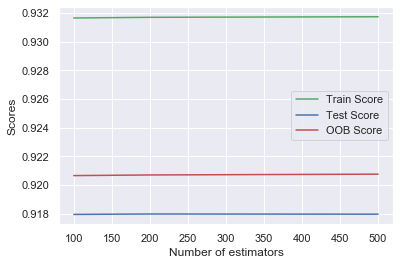

In [44]:
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor

sns.set(rc={'figure.figsize':(20,12)})
%matplotlib inline
train_score_array = []
test_score_array = []
oob_score_array=[]

for n_estimators in [100,200,500]:
    rf_reg = RandomForestRegressor(n_estimators = n_estimators,random_state = 0, n_jobs= -1)
    bag_reg_rf = BaggingRegressor(rf_reg, n_estimators= 250, max_samples= 250, bootstrap = True, random_state=0, oob_score=True)
    bag_reg_rf.fit(X_train, y_train)
    train_score_array.append(bag_reg_rf.score(X_train, y_train))
    test_score_array.append(bag_reg_rf.score(X_test, y_test))
    oob_score_array.append(bag_reg_rf.oob_score_)
    
print('Traing Score: {:.4f}%'.format(bag_reg_rf.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(bag_reg_rf.score(X_test, y_test)*100))

x_axis = [100,200,500]
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.plot(x_axis, oob_score_array, c = 'r', label = 'OOB Score')
plt.legend()
plt.xlabel('Number of estimators')
plt.ylabel('Scores')
plt.show()

<h2>Pasting</h2>

<p>When sampling is performed without replacement, it is called pasting. To perform pasting, we have made the hyper parameter <b>'bootstrap'</b> which is responsible for aggregation set to False while building the model</p>

<h3>1. Pasting with Decision Tree Regressor</h3>

<b><i>Grid Search to find best parameter for Decision Tree Regressor</i></b>

In [17]:
dtree_param_grid = {'max_depth' : range(1,10),'min_samples_leaf' : range(1,10)}

grid_search = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = dtree_param_grid , return_train_score=True, n_jobs= -1)
grid_search.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Best parameters: {'max_depth': 9, 'min_samples_leaf': 5}
Best cross-validation score: 0.92


In [18]:
param_grid = {'n_estimators': [50,100,200,500],
              'max_samples': [50,100,200,400,500],
             'max_features': range(1,10)}

grid_search_bag = GridSearchCV(BaggingRegressor(), param_grid, cv=10, return_train_score=True, n_jobs = -1)
grid_search_bag.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_bag.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_bag.best_score_))

Best parameters: {'max_features': 9, 'max_samples': 500, 'n_estimators': 200}
Best cross-validation score: 0.94


<b><i>Rebuilding the model with the best parameters</i></b>

Text(0, 0.5, 'Scores')

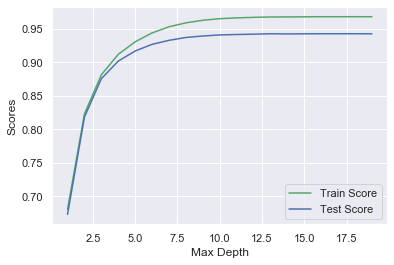

In [26]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor

sns.set(rc={'figure.figsize':(20,12)})
%matplotlib inline
train_score_array = []
test_score_array = []

for n in range(1,20):
    dt_reg = DecisionTreeRegressor(max_depth = n, random_state=0)
    bag_reg_dt = BaggingRegressor(dt_reg, n_estimators = 500, max_samples = 500, max_features= 9,bootstrap = False, random_state=0)
    bag_reg_dt.fit(X_train, y_train)
    train_score_array.append(bag_reg_dt.score(X_train, y_train))
    test_score_array.append(bag_reg_dt.score(X_test, y_test))

x_axis = range(1,20)
plt.plot(x_axis, train_score_array, c = 'g', label = 'Train Score')
plt.plot(x_axis, test_score_array, c = 'b', label = 'Test Score')
plt.legend()
plt.xlabel('Max Depth')
plt.ylabel('Scores')

In [29]:
dt_reg = DecisionTreeRegressor(max_depth = 9, random_state=0)
bag_reg_dt = BaggingRegressor(dt_reg, n_estimators = 500, max_samples=500, bootstrap = False,random_state=0)
bag_reg_dt.fit(X_train, y_train)
y_pred4 = bag_reg_dt.predict(X_test)

print('Train score: {:.4f}%'.format(bag_reg_dt.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(bag_reg_dt.score(X_test, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred4))))

Train score: 96.7211%
Test score: 94.1319%
RMSE: 2.2883


<h3>2. Pasting with KNN Regressor</h3>

<b><i>Grid Search to find best parameter for KNN Regressor</i></b>

In [30]:
knn_param_grid = {'n_neighbors' : range(1,20), 'p': [1,2], 'weights': ['distance','uniform']}

grid_knn = GridSearchCV(KNeighborsRegressor(), param_grid = knn_param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_knn.fit(X_train, y_train)

print("Best parameters: {}".format(grid_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_knn.best_score_))

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.93


<b><i> Rebuilding the model with best parameters</i></b>

In [31]:
from sklearn.ensemble import BaggingRegressor
from sklearn.neighbors import KNeighborsRegressor

bag_reg_knn2 = BaggingRegressor(KNeighborsRegressor(5, p=1, weights= 'distance'), max_features= 9, max_samples=500, n_estimators= 200, random_state=0, bootstrap = False)
bag_reg_knn2.fit(X_train, y_train)
y_pred_knn2 = bag_reg_knn2.predict(X_test)

print('Train score: {:.4f}%'.format(bag_reg_knn2.score(X_train, y_train)*100))
print('Test score: {:.4f}%'.format(bag_reg_knn2.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred_knn2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred_knn2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred_knn2)))
print("r2_Score:",r2_score(y_test, y_pred_knn2))

Train score: 94.4210%
Test score: 90.2201%

MAE: 2.1060860992276758
MSE: 8.726836580326419
RMSE: 2.9541219643620704
r2_Score: 0.9022007521208129


<h2>AdaBoost Boosting</h2>

<h3>1. AdaBoost with Decision Tree Regressor</h3>

<b><i>Grid search to find best parameters for adaboost boosting for Decision Tree Regression</i></b>

In [35]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import metrics

param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1],
             'loss': ['linear', 'square', 'exponential']}

grid_search_ada = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=10, return_train_score=True, n_jobs= -1, verbose= True)
grid_search_ada.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))

Fitting 10 folds for each of 48 candidates, totalling 480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   31.5s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 480 out of 480 | elapsed:  5.7min finished


Best parameters: {'learning_rate': 1, 'loss': 'linear', 'n_estimators': 100}
Best cross-validation score: 0.90


In [36]:
adabst = AdaBoostRegressor(n_estimators = 100, loss = 'linear', learning_rate= 1, random_state=0)
adabst.fit(X_train, y_train)
y_pred1 = adabst.predict(X_test)
print('Traing Score: {:.4f}%'.format(adabst.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(adabst.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred1))
print('MSE:', metrics.mean_squared_error(y_test, y_pred1))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred1)))
print("r2_Score:",r2_score(y_test, y_pred1))

Traing Score: 91.3943%
Test Score: 89.6859%

MAE: 2.4063650225644744
MSE: 9.203477725752691
RMSE: 3.0337234095666488
r2_Score: 0.896859166415398


<b><i>Applying AdaBoost Boosting on the decision tree regressor</i></b>

In [41]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor

adabst = AdaBoostRegressor(DecisionTreeRegressor(max_depth= 10, min_samples_leaf = 5), n_estimators=100, learning_rate= 1, random_state=0)
adabst.fit(X_train, y_train)
y_pred2 = adabst.predict(X_test)
print('Traing Score: {:.4f}%'.format(adabst.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(adabst.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("r2_Score:",r2_score(y_test, y_pred2))

Traing Score: 99.5165%
Test Score: 96.0440%

MAE: 1.2393978009278825
MSE: 3.530001248847343
RMSE: 1.8788297551527502
r2_Score: 0.9604402507171793


<b>Tree depth of 10, and minimum sample leaf of 5 was giving me the best results</b>

<h3>2. AdaBoost Regressor with KNearestNeighbor</h3>

<b><i>Finding best parameter using grid search</i></b>

In [42]:
param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1]}

grid_search_ada = GridSearchCV(AdaBoostRegressor(random_state = 0), param_grid, cv=10, return_train_score=True, n_jobs= -1)
grid_search_ada.fit(X_train, y_train)

print("Best parameters: {}".format(grid_search_ada.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ada.best_score_))

Best parameters: {'learning_rate': 1, 'n_estimators': 100}
Best cross-validation score: 0.90


<b><i>Applying KNN regressor with n_neighbors = 5, p =1 on the dataset</i></b>

In [52]:
lreg = KNeighborsRegressor(n_neighbors=5, p=1)
lreg.fit(X_train,y_train)
y_pred = lreg.predict(X_test)
print('Training score: {:.2f}%'.format(lreg.score(X_train, y_train)*100))
print('Test score: {:.2f}%'.format(lreg.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print("r2_Score:",r2_score(y_test, y_pred))

Training score: 95.44%
Test score: 92.50%

MAE: 1.73262473204218
MSE: 6.693472780769209
RMSE: 2.5871746714841675
r2_Score: 0.9249880987648156


<b><i>Applying Adaboost boosting on KNN regressor with n_neighbors = 5, p =1</i></b>

In [53]:
ada_reg = AdaBoostRegressor(KNeighborsRegressor(n_neighbors=5, p = 1), n_estimators=100,  learning_rate = 1, random_state=0)
ada_reg.fit(X_train, y_train)
y_pred2 = ada_reg.predict(X_test)

print('Training score: {:.2f}%'.format(ada_reg.score(X_train, y_train)*100))
print('Test score: {:.2f}%'.format(ada_reg.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred2))
print('MSE:', metrics.mean_squared_error(y_test, y_pred2))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))
print("r2_Score:",r2_score(y_test, y_pred2))

Training score: 97.54%
Test score: 91.41%

MAE: 1.97483005588392
MSE: 7.66803093443923
RMSE: 2.7691209678234046
r2_Score: 0.9140664946341361


<b><i><u>Observation</u></i> : We can see that AdaBoost boosting is improving our Train score but also leading to overfitting for KNN regressor</b>

<h2>Gradient Boosting</h2>

<b><i>Grid search to find best parameters for gradient boosting.</i></b>

In [54]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {'n_estimators': [50,100,200,500],
              'learning_rate': [.01, .05, .1, 1], 'max_depth': np.arange(1, 10)}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state = 0), param_grid, cv=10, return_train_score=True, n_jobs= -1, verbose= True)
grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 10 folds for each of 144 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    8.2s
[Parallel(n_jobs=-1)]: Done 192 tasks      | elapsed:   58.0s
[Parallel(n_jobs=-1)]: Done 442 tasks      | elapsed:  5.3min
[Parallel(n_jobs=-1)]: Done 792 tasks      | elapsed:  9.4min
[Parallel(n_jobs=-1)]: Done 1242 tasks      | elapsed: 13.4min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 14.7min finished


Best parameters: {'learning_rate': 0.05, 'max_depth': 6, 'n_estimators': 500}
Best cross-validation score: 0.96


<b><i>Building the Gradient Boosting model with best parameters found by grid search</i></b>

In [55]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth= 6, n_estimators= 500, learning_rate= 0.05, random_state=0)
gbrt.fit(X_train, y_train)
y_pred3 = gbrt.predict(X_test)
print('Traing Score: {:.4f}%'.format(gbrt.score(X_train, y_train)*100))
print("Test Score: {:.4f}%".format(gbrt.score(X_test, y_test)*100))

print()
print('MAE:', metrics.mean_absolute_error(y_test, y_pred3))
print('MSE:', metrics.mean_squared_error(y_test, y_pred3))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))
print("r2_Score:",r2_score(y_test, y_pred3))

Traing Score: 99.9281%
Test Score: 95.9518%

MAE: 1.1906763554285111
MSE: 3.6122755097789336
RMSE: 1.9005987240285451
r2_Score: 0.9595182257926992


<h2>PCA on the Dataset</h2>

In [13]:
from sklearn.decomposition import PCA

pca_regression = PCA(n_components = .98, random_state= 0)
X_train_pca = pca_regression.fit_transform(X_train)
X_test_pca = pca_regression.transform(X_test)

<b><i>Number of features after applying PCA to the dataset</i></b>

In [14]:
pca_regression.n_components_

14

In [15]:
pd.DataFrame({'Variance Ratio': pca_regression.explained_variance_ratio_})

,Variance Ratio
0,0.347365
1,0.155628
2,0.120521
3,0.081474
4,0.048506
5,0.045260
6,0.040078
7,0.030532
8,0.028244
9,0.025151


In [16]:
1 - pca_regression.explained_variance_ratio_.sum()

0.015671095484987796

<h3>1. KNN Regressor with Principal Component</h3>

<b><i>Grid Search to find the best parameters for KNN Regressor</i></b>

In [88]:
param_grid_knn = {'n_neighbors' : range(1,20), 'p': [1,2], 'weights': ['distance','uniform']}

grid_search_knn = GridSearchCV(KNeighborsRegressor(), param_grid = param_grid_knn, cv=10, return_train_score=True, n_jobs= -1)
grid_search_knn.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_knn.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_knn.best_score_))

Best parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
Best cross-validation score: 0.90


<b><i>Building the model with best parameters</i></b>

In [89]:
knn_pca = KNeighborsRegressor(n_neighbors=5, p = 1, weights= 'distance')
knn_pca.fit(X_train_pca, y_train)
y_pred_knn_pca = knn_pca.predict(X_test_pca)

print('Train score: {:.4f} %'.format(knn_pca.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(knn_pca.score(X_test_pca, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_knn_pca))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_knn_pca)))

Train score: 100.0000 %
Test score: 88.8113 %
RMSE: 3.1597
r2_score: 0.8881


<h3>2. Linear Regression with Principal Component</h3>

In [90]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

lreg_pca = LinearRegression(copy_X = True, fit_intercept = True, normalize= False)
lreg_pca.fit(X_train_pca, y_train)
pred_linear_pca = lreg_pca.predict(X_test_pca)

print('Train score: {:.4f} %'.format(lreg_pca.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(lreg_pca.score(X_test_pca, y_test)*100))
print('\n')
print("Intercept:",lreg_pca.intercept_)
print('MAE:', metrics.mean_absolute_error(y_test, pred_linear_pca))
print('MSE:', metrics.mean_squared_error(y_test, pred_linear_pca))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,pred_linear_pca))))
print('r2_score: {:.4f}'.format(r2_score(y_test,pred_linear_pca)))

Train score: 80.4021 %
Test score: 79.7349 %


Intercept: 69.12489033164296
MAE: 3.1707020222046114
MSE: 18.082959282900084
RMSE: 4.2524
r2_score: 0.7973


<h3>3. Ridge Regression with Principal Component</h3>

<b><i>Grid Search to find best parameters on Ridge Regression</i></b>

In [91]:
ridge_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 3, 5,10, 12, 15, 20, 100]}
            
grid_search_ridge = GridSearchCV(Ridge(), param_grid = ridge_param_grid, return_train_score=True, n_jobs= -1)
grid_search_ridge.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_ridge.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_ridge.best_score_))

Best parameters: {'alpha': 0.1}
Best cross-validation score: 0.80


<b><i>Building the model with best parameters</i></b>

In [93]:
ridge_pca = Ridge(alpha = 0.1)
ridge_pca.fit(X_train_pca,y_train)

y_pred_ridge_pca = ridge_pca.predict(X_test_pca)

print('Train score: {:.4f} %'.format(ridge_pca.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(ridge_pca.score(X_test_pca, y_test)*100))
print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_ridge_pca))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_ridge_pca)))

Train score: 80.4019 %
Test score: 79.7285 %
RMSE: 4.2531
r2_score: 0.7973


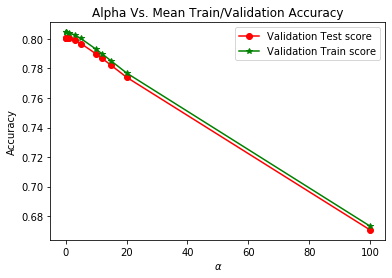

In [22]:
results = pd.DataFrame(grid_search_ridge.cv_results_)
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

<h3>4. Lasso Regression with Principal Component</h3>

<b><i>Grid Search to find best parameters on Lasso Regression</i></b>

In [23]:
from  sklearn.linear_model import Lasso

lasso_param_grid = {'alpha': [0.001, 0.01, 0.1, 1, 10, 100, 1000]}
            
grid_search_lasso = GridSearchCV(Lasso(random_state= 0), param_grid = lasso_param_grid , return_train_score = True, n_jobs= -1)
grid_search_lasso.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_lasso.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_lasso.best_score_))

Best parameters: {'alpha': 0.001}
Best cross-validation score: 0.80


<b><i>Building the model with best parameters</i></b>

In [24]:
lasso_pca = Lasso(alpha = 0.001)
lasso_pca.fit(X_train_pca, y_train)

y_pred_lasso_pca = lasso_pca.predict(X_test_pca)

print('Train score: {:.4f} %'.format(lasso_pca.score(X_train_pca, y_train)*100))
print('Test score: {:.4f} %'.format(lasso_pca.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_lasso_pca))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_lasso_pca)))

Train score: 80.4013 %
Test score: 79.7201 %
RMSE: 4.2540
r2_score: 0.7972


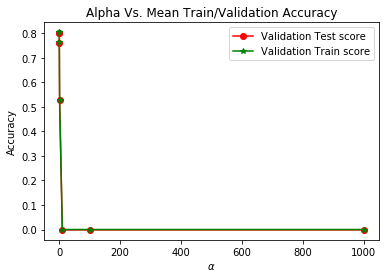

In [25]:
results = pd.DataFrame(grid_search_lasso.cv_results_)
plt.plot(results['param_alpha'],results['mean_test_score'],marker='o',c='r',label='Validation Test score')
plt.plot(results['param_alpha'],results['mean_train_score'],marker='*',c='g',label='Validation Train score')
plt.title('Alpha Vs. Mean Train/Validation Accuracy')
plt.xlabel(r'$\alpha$')
plt.ylabel('Accuracy')
plt.legend()

<h3>5. Polynomial Regression with Principal Component</h3>

In [26]:
from  sklearn.preprocessing  import PolynomialFeatures
poly_train_score_list = []
poly_test_score_list = []

for n in range(1,4):
    poly_pca = PolynomialFeatures(n)
    X_train_poly = poly_pca.fit_transform(X_train_pca)
    X_test_poly = poly_pca.transform(X_test_pca)
    
    lreg_poly =LinearRegression()
    lreg_poly.fit(X_train_poly, y_train)
    poly_train_score_list.append(lreg_poly.score(X_train_poly, y_train))
    poly_test_score_list.append(lreg_poly.score(X_test_poly, y_test))

In [27]:
poly_score_list = pd.DataFrame({'Train score' : poly_train_score_list, 'Test Score' : poly_test_score_list}) 
poly_score_list

,Train score,Test Score
0,0.804021,0.797349
1,0.910704,0.897668
2,0.969433,0.604333


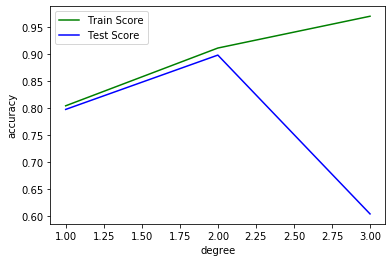

In [28]:
%matplotlib inline

x_axis = range(1,4)
plt.plot(x_axis, poly_train_score_list, c = 'g', label = 'Train Score')
plt.plot(x_axis, poly_test_score_list, c = 'b', label = 'Test Score')
plt.xlabel('degree')
plt.ylabel('accuracy')
plt.legend()

<b><i>Building the model with best parameters, degree = 2</i></b>

In [29]:
poly = PolynomialFeatures(2)
X_train_poly = poly.fit_transform(X_train_pca)
X_test_poly = poly.transform(X_test_pca)
lreg_poly.fit(X_train_poly, y_train)

y_poly = lreg_poly.predict(X_test_poly)

print('Train score: {:.4f} %'.format(lreg_poly.score(X_train_poly, y_train)*100))
print('Test score: {:.4f} %'.format(lreg_poly.score(X_test_poly, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_poly))))
print('R2 score: {:.4f}'.format(r2_score(y_test,y_poly)))

Train score: 91.0704 %
Test score: 89.7668 %
RMSE: 3.0218
R2 score: 0.8977


<h3>6. Decision Tree Regressor with Principal Component</h3>

In [30]:
dtree_param_grid = {'max_depth' : range(1,10),'min_samples_leaf' : range(1,10)}

grid_search_dtree = GridSearchCV(DecisionTreeRegressor(random_state=0), param_grid = dtree_param_grid , return_train_score=True, n_jobs= -1)
grid_search_dtree.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_dtree.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_dtree.best_score_))

Best parameters: {'max_depth': 9, 'min_samples_leaf': 4}
Best cross-validation score: 0.80


<b><i>Building the model with best parameters</i></b>

In [57]:
dtree_pca = DecisionTreeRegressor(max_depth = 9, min_samples_leaf = 4, random_state = 0)
dtree_pca.fit(X_train_pca, y_train)

y_pred_dtree_pca = dtree_pca.predict(X_test_pca)

print('Accuracy on training set: {:.3f}%'.format(dtree_pca.score(X_train_pca, y_train)*100))
print('Accuracy on test set: {:.3f}%'.format(dtree_pca.score(X_test_pca, y_test)*100))

print('RMSE: {:.4f}'.format(np.sqrt(mean_squared_error(y_test,y_pred_dtree_pca))))
print('r2_score: {:.4f}'.format(r2_score(y_test,y_pred_dtree_pca)))

Accuracy on training set: 93.470%
Accuracy on test set: 79.903%
RMSE: 4.2347
r2_score: 0.7990


<h3>7. Support Vector Machine with Principal Component</h3>

In [59]:
from sklearn.svm import SVR
from sklearn.svm import LinearSVR

param_grid_svm = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}

grid_search_svm = GridSearchCV(SVR(), param_grid_svm, cv=10, return_train_score=True, n_jobs= -1)
grid_search_svm.fit(X_train_pca, y_train)
print("Best parameters: {}".format(grid_search_svm.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_svm.best_score_))

Best parameters: {'C': 100, 'gamma': 1}
Best cross-validation score: 0.92


<b>a) Linear SVR</b>

In [71]:
clf1 = LinearSVR(C=100).fit(X_train_pca, y_train)

print('Training score for LinearSVR - {:.2f}%'.format(clf1.score(X_train_pca,y_train)*100))
print('Test score for LinearSVR - {:.2f}%'.format(clf1.score(X_test_pca,y_test)*100))

Training score for LinearSVR - 79.36%
Test score for LinearSVR - 79.22%


<b>b) SVR Kernel-Linear</b>

In [72]:
clf2 = SVR(kernel='linear', C=100, gamma= 0.001).fit(X_train_pca, y_train)

print('Train score for SVR kernel - Linear {:.2f}%'.format(clf2.score(X_train_pca,y_train)*100))
print('Test score for SVR kernel - Linear {:.2f}%'.format(clf2.score(X_test_pca,y_test)*100))

Train score for SVR kernel - Linear 79.40%
Test score for SVR kernel - Linear 79.26%


<b>c) SVR Kernel-rbf</b>

In [83]:
param_grid = {'C': [0.001, 0.01, 0.1, 1],
              'gamma': [0.001, 0.01, 0.1, 1]}

grid_search_rbf = GridSearchCV(SVR(kernel='rbf'), param_grid, cv=10, return_train_score=True, n_jobs= -1)

grid_search_rbf.fit(X_train_pca, y_train)

print("Best parameters: {}".format(grid_search_rbf.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_rbf.best_score_))

Best parameters: {'C': 1, 'gamma': 1}
Best cross-validation score: 0.85


In [85]:
clf3 = SVR(kernel='rbf', gamma = 1, C=100).fit(X_train_pca, y_train)

print('Train score for SVR kernel - RBF: {:.2f}%'.format(clf3.score(X_train_pca,y_train)*100))
print('Test score for SVR kernel - RBF: {:.2f}%'.format(clf3.score(X_test_pca,y_test)*100))

Train score for SVR kernel - RBF: 95.85%
Test score for SVR kernel - RBF: 91.41%


<b>d) SVR Kernel-Poly</b>

In [78]:
param_grid = {'C': [.001, 0.01, 0.1, 1],
              'gamma': [.001, 0.01, 0.1, 1],
             'degree': [2, 3, 4]}


grid_search_poly = GridSearchCV(SVR(kernel='poly'), param_grid, cv=10, return_train_score=True, n_jobs=-1)
grid_search_poly.fit(X_train_pca, y_train)


print("Best parameters: {}".format(grid_search_poly.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search_poly.best_score_))

Best parameters: {'C': 1, 'degree': 3, 'gamma': 1}
Best cross-validation score: 0.66


In [86]:
clf4 = SVR(kernel='poly', degree=3, C=1, gamma= 1).fit(X_train_pca, y_train)

print('Train score for SVR kernel - Poly: {:.2f}%'.format(clf4.score(X_train_pca,y_train)*100))
print('Test score for SVR kernel - Poly: {:.2f}%'.format(clf4.score(X_test_pca,y_test)*100))

Train score for SVR kernel - Poly: 69.39%
Test score for SVR kernel - Poly: 67.25%


<h2>Model Performance with Original Variables vs. Principal Components</h2>

In [87]:
outside = ['Without PCA','Without PCA','With PCA','With PCA']
inside = ['Training Accuracy','Test Accuracy','Training Accuracy','Test Accuracy']
hier_index = list(zip(outside,inside))
hier_index = pd.MultiIndex.from_tuples(hier_index)

In [116]:
# scores from Project-1 (Models without PCA)

data_regression = np.array([(1.0000,0.8099,0.8087,0.8091,0.9255,0.9722,0.7802,0.7945,0.9635,0.7125),
                     (0.9316,0.8084,0.8044,0.8085,0.8931,0.9123,0.7775,0.7922,0.9205,0.7021),
                     (1.000,0.8040,0.8040,0.8040,0.9107,0.9347,0.7936,0.7940,0.9585,0.6939),
                     (0.8881,0.7973,0.7972,0.7972,0.8976,0.7990,0.7922,0.7926,0.9141,0.6725)])

# creating a dataframe
df = pd.DataFrame(data_regression, index = hier_index,columns=['KNN','Linear','Ridge','Lasso','Polynomial', 'Decision Tree','LinearSVR','SVR kernel-Linear','SVR kernel-rbf','SVR kernel-poly'])


import seaborn as sns

cm = sns.light_palette("#2ecc71", as_cmap = True)
table = df.style.background_gradient(cmap='PuBu')
table

<h3>Conclusion</h3>

<b><p>For Regression, the best model with Principal components came out to be SVR with kernel "rbf" and test score of ~91%. There is no significant improvement in the models after using PCA as we can see that after applying PCA on the dataset, there is a slight drop in the accuracies in most of the models. </p></b>

<h2>Neural Networks - Regression - MLP</h2>

In [173]:
X = life_updated.drop(['Life_Expectancy'],axis =1)
y = life_updated['Life_Expectancy']

X_train_org, X_test_org, y_train, y_test = train_test_split(X ,y, random_state = 1, test_size=0.3)

scaler = MinMaxScaler()
X_train_NN_R = scaler.fit_transform(X_train_org)
X_test_NN_R = scaler.transform(X_test_org)

In [174]:
print(X_train_NN_R.shape)
print(X_test_NN_R.shape)

(2056, 20)
(882, 20)


In [175]:
import numpy
from sklearn.model_selection import GridSearchCV
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.wrappers.scikit_learn import KerasClassifier

setting global seed to ensure reproducibility

In [176]:
from numpy.random import seed
np.random.seed(10)

<b>Grid Search to find the best epochs and batch size</b>

In [177]:
def create_model():
    #create model
    model = Sequential()
    model.add(Dense(20, input_dim=20, activation='relu'))   #input layer
    model.add(Dense(8, activation='relu'))
    model.add(Dense(1, activation='sigmoid'))    #Output layer
    
    #compile model
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [178]:
model = KerasClassifier(build_fn = create_model, verbose = 0)

param_grid = {'batch_size':[20,40,60,80,100,120] , 'epochs':[10, 50, 100]}
grid_search = GridSearchCV(estimator= model, param_grid = param_grid, cv = 5, n_jobs = -1, verbose= True)

grid_search_result = grid_search.fit(X_train, y_train)
print("Best parameters: {}".format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:  4.4min finished


Best parameters: {'batch_size': 60, 'epochs': 10}
Best cross-validation score: 0.00


__Step 1: Build the model__

In [179]:
model = Sequential()

#input layer
model.add(Dense(10, input_dim = 20, activation = 'relu'))

#hidden layer
model.add(Dense(20, activation = 'sigmoid'))
model.add(Dense(20, activation = 'sigmoid'))

#output layer
model.add(Dense(1))

__Step 2:  Compile: create computational graph__

In [180]:
model.compile(loss = 'mse', optimizer = 'sgd', metrics = ['mse'])

__Step 3: Train the model__

In [181]:
model.fit(X_train_NN_R, y_train, epochs = 100 , batch_size =120)

Epoch 1/100
2056/2056 [==============================] - 4s 2ms/step - loss: 715.9944 - mean_squared_error: 715.9944
Epoch 2/100
2056/2056 [==============================] - 0s 36us/step - loss: 90.2268 - mean_squared_error: 90.2268
Epoch 3/100
2056/2056 [==============================] - 0s 38us/step - loss: 88.4819 - mean_squared_error: 88.4819
Epoch 4/100
2056/2056 [==============================] - 0s 44us/step - loss: 81.1191 - mean_squared_error: 81.1191
Epoch 5/100
2056/2056 [==============================] - 0s 41us/step - loss: 63.8497 - mean_squared_error: 63.8497
Epoch 6/100
2056/2056 [==============================] - 0s 39us/step - loss: 52.8031 - mean_squared_error: 52.8031
Epoch 7/100
2056/2056 [==============================] - 0s 41us/step - loss: 36.2985 - mean_squared_error: 36.2985
Epoch 8/100
2056/2056 [==============================] - 0s 42us/step - loss: 37.6865 - mean_squared_error: 37.6865
Epoch 9/100
2056/2056 [==============================] - 0s 39us/step -

2056/2056 [==============================] - 0s 60us/step - loss: 12.5169 - mean_squared_error: 12.5169
Epoch 71/100
2056/2056 [==============================] - 0s 51us/step - loss: 20.1265 - mean_squared_error: 20.1265
Epoch 72/100
2056/2056 [==============================] - 0s 50us/step - loss: 17.2855 - mean_squared_error: 17.2855
Epoch 73/100
2056/2056 [==============================] - 0s 43us/step - loss: 13.0366 - mean_squared_error: 13.0366
Epoch 74/100
2056/2056 [==============================] - ETA: 0s - loss: 13.0214 - mean_squared_error: 13.02 - 0s 43us/step - loss: 12.9612 - mean_squared_error: 12.9612
Epoch 75/100
2056/2056 [==============================] - 0s 40us/step - loss: 18.3112 - mean_squared_error: 18.3112
Epoch 76/100
2056/2056 [==============================] - 0s 37us/step - loss: 13.4404 - mean_squared_error: 13.4404
Epoch 77/100
2056/2056 [==============================] - 0s 37us/step - loss: 14.7055 - mean_squared_error: 14.7055
Epoch 78/100
2056/2056 

In [182]:
from sklearn.metrics import r2_score
y_train_pred = model.predict(X_train_NN_R)
y_test_pred = model.predict(X_test_NN_R)

print('Train score: {:.4f}%'.format(r2_score(y_train, y_train_pred)*100))
print('Test score: {:.4f}%'.format(r2_score(y_test, y_test_pred)*100))

Train score: 83.3138%
Test score: 81.7857%


__Step 4: Model Evaluation__

In [183]:
model.evaluate(X_train_NN_R, y_train)

2056/2056 [==============================] - 2s 1ms/step


[15.319490599725032, 15.319490599725032]

In [184]:
model.evaluate(X_test_NN_R, y_test)

882/882 [==============================] - 0s 96us/step


[15.845118775659678, 15.845118775659678]

<h3>Neural Network - Perceptron model</h3>

__1- Define Model__

In [185]:
model = Sequential()
model.add(Dense(20, input_dim = 20, kernel_initializer= 'normal', activation= 'relu'))
model.add(Dense(1, kernel_initializer= 'normal'))

__2- Compile Model__

In [186]:
model.compile(loss = 'mse', optimizer= 'sgd', metrics= ['mse'])

__3 - Fit Model__

In [188]:
model.fit(X_train_NN_R, y_train, epochs= 100, batch_size= 20)

Epoch 1/100
2056/2056 [==============================] - 5s 2ms/step - loss: 1431.7475 - mean_squared_error: 1431.7475
Epoch 2/100
2056/2056 [==============================] - 0s 188us/step - loss: 118.5167 - mean_squared_error: 118.5167
Epoch 3/100
2056/2056 [==============================] - 0s 196us/step - loss: 92.2744 - mean_squared_error: 92.2744
Epoch 4/100
2056/2056 [==============================] - 0s 187us/step - loss: 71.8518 - mean_squared_error: 71.8518
Epoch 5/100
2056/2056 [==============================] - 0s 194us/step - loss: 33.0940 - mean_squared_error: 33.0940
Epoch 6/100
2056/2056 [==============================] - 1s 301us/step - loss: 25.4763 - mean_squared_error: 25.4763
Epoch 7/100
2056/2056 [==============================] - 1s 257us/step - loss: 23.3075 - mean_squared_error: 23.3075
Epoch 8/100
2056/2056 [==============================] - 0s 187us/step - loss: 21.8339 - mean_squared_error: 21.8339
Epoch 9/100
2056/2056 [==============================] - 0s 

2056/2056 [==============================] - 0s 183us/step - loss: 18.4138 - mean_squared_error: 18.4138
Epoch 71/100
2056/2056 [==============================] - 0s 179us/step - loss: 18.1202 - mean_squared_error: 18.1202
Epoch 72/100
2056/2056 [==============================] - 0s 180us/step - loss: 18.1638 - mean_squared_error: 18.1638
Epoch 73/100
2056/2056 [==============================] - 0s 178us/step - loss: 17.8548 - mean_squared_error: 17.8548
Epoch 74/100
2056/2056 [==============================] - 0s 176us/step - loss: 17.8484 - mean_squared_error: 17.8484
Epoch 75/100
2056/2056 [==============================] - 0s 186us/step - loss: 18.0783 - mean_squared_error: 18.0783
Epoch 76/100
2056/2056 [==============================] - 0s 180us/step - loss: 18.0489 - mean_squared_error: 18.0489
Epoch 77/100
2056/2056 [==============================] - 0s 187us/step - loss: 17.8309 - mean_squared_error: 17.8309
Epoch 78/100
2056/2056 [==============================] - 0s 187us/st

__4 - Evaluate model__

In [189]:
model.evaluate(X_test_NN_R, y_test)

882/882 [==============================] - 2s 2ms/step


[18.628606381059505, 18.628606381059505]

In [191]:
from sklearn.metrics import r2_score, recall_score, precision_score

y_train_predict = model.predict(X_train_NN_R)
y_test_predict = model.predict(X_test_NN_R)

print('Train score: {:.2f}%'.format(r2_score(y_train, y_train_predict)*100))
print('Test score: {:.2f}%'.format(r2_score(y_test, y_test_predict)*100))

Train score: 80.17%
Test score: 78.59%


<center><b>___________________________________________________________________________________________________________</b></center>

<center><h1 style="font-size:30px; LINE-HEIGHT:0px">Classification Task<h1 style="font-size:30px; LINE-HEIGHT:0px"></center>

__About the dataset__

<p>This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005.</p>

<p>This dataset includes over 30,000 records and 25 attributes.</p>

<h3>Columns</h3>

   1. ID : ID of each client
   2. LIMIT_BAL : Amount of given credit in NT dollars (includes individual and family/supplementary credit
   3. SEX</b> : Gender (1=male, 2=female)
   4. EDUCATION</b> : (1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown)
   5. MARRIAGE</b> : Marital status (1=married, 2=single, 3=others)
   6. AGE</b> : Age in years
   7. PAY_0</b> : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months, ... 8=payment delay for eight months, 9=payment delay for nine months and above)
   8. PAY_2</b> : Repayment status in August, 2005 (scale same as above)
   9. PAY_3</b> : Repayment status in July, 2005 (scale same as above)
   10. PAY_4</b> : Repayment status in June, 2005 (scale same as above)
   11. PAY_5</b> : Repayment status in May, 2005 (scale same as above)
   12. PAY_6</b> : Repayment status in April, 2005 (scale same as above)
   13. BILL_AMT1</b> : Amount of bill statement in September, 2005 (NT dollar)
   14. BILL_AMT2</b> : Amount of bill statement in August, 2005 (NT dollar)
   15. BILL_AMT3</b> : Amount of bill statement in July, 2005 (NT dollar)
   16. BILL_AMT4</b> : Amount of bill statement in June, 2005 (NT dollar)
   17. BILL_AMT5</b> : Amount of bill statement in May, 2005 (NT dollar)
   18. BILL_AMT6</b> : Amount of bill statement in April, 2005 (NT dollar)
   19. PAY_AMT1</b> : Amount of previous payment in September, 2005 (NT dollar)
   20. PAY_AMT2</b> : Amount of previous payment in August, 2005 (NT dollar)
   21. PAY_AMT3</b> : Amount of previous payment in July, 2005 (NT dollar)
   22. PAY_AMT4</b> : Amount of previous payment in June, 2005 (NT dollar)
   23. PAY_AMT5</b> :  Amount of previous payment in May, 2005 (NT dollar)
   24. PAY_AMT6</b> : Amount of previous payment in April, 2005 (NT dollar)
   25. default.payment.next.month : Default payment (1=yes, 0=no)

__Source of Dataset__: 
https://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients

<h2>Load Data</h2> 

__EDA and data preprocessing was handled in project 1, so we are simply importing the prepared data for use in project 2__

In [195]:
credit_updated.shape

(30000, 24)

In [196]:
credit_updated.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Is_Default
0,20000,2,2,1,24,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.000000,4787.827744,0.0,1.0
1,120000,2,2,2,26,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,4811.208696,0.000000,2000.0,1.0
2,90000,2,2,2,34,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.000000,1000.000000,5000.0,0.0
3,50000,2,2,1,37,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.000000,1069.000000,1000.0,0.0
4,50000,1,2,1,57,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.000000,689.000000,679.0,0.0


In [197]:
X = credit_updated.drop(['Is_Default'],axis =1)
y = credit_updated['Is_Default']

X_train_org, X_test_org, y_train, y_test = train_test_split(X ,y, random_state = 0, test_size = 0.3)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)